In [1]:
import pandas as pd

In [103]:
rental = pd.read_csv("geocoded_data_rental.csv")

In [104]:
rental.head()

,Year,Month,rent_approval_date,town,block,street_name,flat_type,monthly_rent,latitude,longitude
0,2021,1,2021-01-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,1.369208,103.850399
1,2021,1,2021-01-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,1.369208,103.850399
2,2021,1,2021-01-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,1.369208,103.850399
3,2021,1,2021-01-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,1.369208,103.850399
4,2021,1,2021-01-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,1.369208,103.850399


In [105]:
rental.drop(columns = ["rent_approval_date",'latitude','longitude'],inplace=True)

In [106]:
rental.head()

,Year,Month,town,block,street_name,flat_type,monthly_rent
0,2021,1,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021,1,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021,1,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021,1,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021,1,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450


In [107]:
spi_rental = pd.read_csv("rental_spi.csv")
rental = pd.merge(spi_rental, rental, on=['Year', 'Month'])

In [108]:
rental.head()

,Month,Year,Index,Q,town,block,street_name,flat_type,monthly_rent
0,12,2023,137.0,1.0,GEYLANG,356A,UBI RD 3,4-ROOM,4200
1,12,2023,137.0,1.0,CLEMENTI,210B,CLEMENTI AVE 6,4-ROOM,4500
2,12,2023,137.0,1.0,BUKIT MERAH,95C,HENDERSON RD,4-ROOM,4200
3,12,2023,137.0,1.0,QUEENSTOWN,21,DOVER CRES,3-ROOM,3500
4,12,2023,137.0,1.0,KALLANG/WHAMPOA,20B,LOR 3 GEYLANG,4-ROOM,4550


In [109]:
rental.drop(columns=['Q'],inplace=True)

In [110]:
rental.head()

,Month,Year,Index,town,block,street_name,flat_type,monthly_rent
0,12,2023,137.0,GEYLANG,356A,UBI RD 3,4-ROOM,4200
1,12,2023,137.0,CLEMENTI,210B,CLEMENTI AVE 6,4-ROOM,4500
2,12,2023,137.0,BUKIT MERAH,95C,HENDERSON RD,4-ROOM,4200
3,12,2023,137.0,QUEENSTOWN,21,DOVER CRES,3-ROOM,3500
4,12,2023,137.0,KALLANG/WHAMPOA,20B,LOR 3 GEYLANG,4-ROOM,4550


In [111]:
rental.drop(columns=['block','street_name'],inplace=True)
rental.head()

,Month,Year,Index,town,flat_type,monthly_rent
0,12,2023,137.0,GEYLANG,4-ROOM,4200
1,12,2023,137.0,CLEMENTI,4-ROOM,4500
2,12,2023,137.0,BUKIT MERAH,4-ROOM,4200
3,12,2023,137.0,QUEENSTOWN,3-ROOM,3500
4,12,2023,137.0,KALLANG/WHAMPOA,4-ROOM,4550


In [112]:
rental.to_csv("rental_spi_encoded.csv")

In [114]:
town_encoded = pd.get_dummies(rental['town'], prefix='town')

#rental = pd.concat([rental, town_encoded], axis=1)

town_encoded.columns

Index(['town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG',
       'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN'],
      dtype='object')

In [ ]:
y = rental['monthly_rent']

X = rental.drop(columns=['monthly_rent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
**
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, rand
import numpy as np

# Define search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1500, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0, 10),
    'subsample': hp.uniform('subsample', 0.1, 1),
    'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
    'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
}

# Define categorical features
categorical_features = ['town', 'flat_type','block','street_name']

def objective(params):
    # Initialize params dictionary
    params = {
        'objective': 'reg:squarederror',  # Set the objective function
        'eval_metric': 'rmse',            # Set the evaluation metric
        'n_estimators': int(params['n_estimators']),  # Number of boosting rounds
        'learning_rate': params['learning_rate'],     # Learning rate
        'max_depth': int(params['max_depth']),        # Maximum tree depth
        'min_child_weight': params['min_child_weight'],   # Minimum sum of instance weight needed in a child
        'subsample': params['subsample'],                # Subsample ratio of the training instances
        'reg_lambda': params['reg_lambda'],              # L2 regularization term on weights
        'reg_alpha': params['reg_alpha'],                # L1 regularization term on weights
    }
    
    # Perform stratified k-fold cross-validation
    skf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Convert categorical columns to category dtype
        for col in categorical_features:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')

        # Create DMatrix
        dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist(), enable_categorical=True)
        dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_test.columns.tolist(), enable_categorical=True)
        
        # Train XGBoost model
        model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'], evals=[(dtest, 'test')],
                          early_stopping_rounds=10)
    

        # Make predictions
        y_pred = model.predict(dtest)

        # Calculate RMSE
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    
    mean_rmse = np.mean(rmse_scores)

    global best_model
    if best_model is None or mean_rmse < best_model['rmse']:
        best_model = {
            'model': model,  # Store the model itself
            'rmse': mean_rmse
        }
    
    return {'loss': mean_rmse, 'status': STATUS_OK}

# Initialize best_model
best_model = None

# Use TPE algorithm to find the best hyperparameters
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=10, trials=trials)

# Retrieve the best model
best_model = best_model['model']

# Print the best hyperparameters
print("Best Hyperparameters:", best)


In [11]:
rental.drop(columns=['block','street_name'],inplace=True)

In [130]:
# Define the mapping dictionary
flat_type_mapping = {
    '1-ROOM': 1,
    '2-ROOM': 2,
    '3-ROOM': 3,
    '4-ROOM': 4,
    '5-ROOM': 5,
    'EXECUTIVE': 6
}


rental['flat_type_encoded'] = rental['flat_type'].map(flat_type_mapping)

In [131]:
rental.drop(columns=['flat_type'],inplace=True)

In [129]:
town_encoded = pd.get_dummies(rental['town'], prefix='town')

rental = pd.concat([rental, town_encoded], axis=1)

In [132]:
rental.drop(columns=['town'],inplace=True)

In [133]:
from sklearn.model_selection import train_test_split

y = rental['monthly_rent']

X = rental.drop(columns=['monthly_rent'])


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42)

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = np.sqrt(-scores)

for fold, score in enumerate(mse_scores, start=1):
    print(f"Fold {fold} RMSE: {score}")

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(mse_scores)
std_rmse = np.std(mse_scores)
print(f"\nMean RMSE for linear Regression: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Fold 1 RMSE: 648.4116328343829
Fold 2 RMSE: 678.1578532248085
Fold 3 RMSE: 505.8724280509126
Fold 4 RMSE: 357.1490886864843
Fold 5 RMSE: 327.9340024145354

Mean RMSE for linear Regression: 503.50500104222476
Standard Deviation of RMSE: 144.05025794083556


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42)

model = DecisionTreeRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = np.sqrt(-scores)

for fold, score in enumerate(mse_scores, start=1):
    print(f"Fold {fold} RMSE: {score}")

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(mse_scores)
std_rmse = np.std(mse_scores)
print(f"\nMean RMSE for DecisionTree Regressor: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Fold 1 RMSE: 628.4624355715431
Fold 2 RMSE: 678.136882471187
Fold 3 RMSE: 526.7329756412445
Fold 4 RMSE: 342.9125503560264
Fold 5 RMSE: 300.17465448078104

Mean RMSE for DecisionTree Regressor: 495.2838997041564
Standard Deviation of RMSE: 150.628965191747


In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42)

model = xgb.XGBRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = np.sqrt(-scores)

for fold, score in enumerate(mse_scores, start=1):
    print(f"Fold {fold} RMSE: {score}")

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(mse_scores)
std_rmse = np.std(mse_scores)
print(f"\nMean RMSE for XGBoost: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Fold 1 RMSE: 621.4805507294295
Fold 2 RMSE: 664.4660216236692
Fold 3 RMSE: 536.6549601683762
Fold 4 RMSE: 341.8289995794465
Fold 5 RMSE: 305.4980623584612

Mean RMSE for XGBoost: 493.9857188918765
Standard Deviation of RMSE: 145.47741667578657


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

np.random.seed(42)

model = RandomForestRegressor()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = np.sqrt(-scores)

for fold, score in enumerate(mse_scores, start=1):
    print(f"Fold {fold} RMSE: {score}")

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(mse_scores)
std_rmse = np.std(mse_scores)
print(f"\nMean RMSE for XGBoost: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Fold 1 RMSE: 626.1774501769909
Fold 2 RMSE: 665.8233294753501
Fold 3 RMSE: 521.115315556005
Fold 4 RMSE: 338.21009954538266
Fold 5 RMSE: 302.79336708259115

Mean RMSE for XGBoost: 490.8239123672639
Standard Deviation of RMSE: 147.31558445528128


In [60]:
y = rental['monthly_rent']

X = rental.drop(columns=['monthly_rent'])

In [61]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_values_l = []
    
    # Iterate through each fold
for train_index, test_index in kf.split(X.values, y.values):  # Convert DataFrame to NumPy array
    X_train, X_test = X.values[train_index], X.values[test_index]  # Convert DataFrame to NumPy array
    y_train, y_test = y.values[train_index], y.values[test_index]
        
    model_l =LinearRegression().fit(X_train, y_train)
        
    y_pred_test_l = model_l.predict(X_test)
    rmse_fold_l = np.sqrt(mean_squared_error(y_test, y_pred_test_l))
    print(rmse_fold_l)
    rmse_values_l.append(rmse_fold_l)
mean_rmse = np.mean(rmse_values_l)
print("mean_rmse of linear regression",mean_rmse)

519.0672629557604
519.0031550446492
513.8689203484789
517.6551733353355
516.679956384311
mean_rmse of linear regression 517.254893613707


In [62]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_values_dt = []
    
    # Iterate through each fold
for train_index, test_index in kf.split(X.values, y.values):  # Convert DataFrame to NumPy array
    X_train, X_test = X.values[train_index], X.values[test_index]  # Convert DataFrame to NumPy array
    y_train, y_test = y.values[train_index], y.values[test_index]
        
    model_dt =DecisionTreeRegressor().fit(X_train, y_train)
        
    y_pred_test_dt = model_dt.predict(X_test)
    rmse_fold_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
    print(rmse_fold_dt)
    rmse_values_dt.append(rmse_fold_dt)
mean_rmse = np.mean(rmse_values_dt)
print("mean_rmse of DecisionTreeRegressor",mean_rmse)

509.6116647106338
512.04606891135
507.92184802004766
507.8666949722436
508.38054884575126
mean_rmse of DecisionTreeRegressor 509.16536509200523


In [63]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_values_rf = []
    
    # Iterate through each fold
for train_index, test_index in kf.split(X.values, y.values):  # Convert DataFrame to NumPy array
    X_train, X_test = X.values[train_index], X.values[test_index]  # Convert DataFrame to NumPy array
    y_train, y_test = y.values[train_index], y.values[test_index]
        
    model_rf =RandomForestRegressor().fit(X_train, y_train)
        
    y_pred_test_rf = model_rf.predict(X_test)
    rmse_fold_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
    print(rmse_fold_rf)
    rmse_values_rf.append(rmse_fold_rf)
mean_rmse = np.mean(rmse_values_rf)
print("mean_rmse of RandomForest",mean_rmse)

508.11629149416757
510.49664087272066
506.57174991368953
506.6035849484755
506.62814928855914
mean_rmse of RandomForest 507.6832833035225


In [64]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_values_xgb = []
    

for train_index, test_index in kf.split(X.values, y.values):  
    X_train, X_test = X.values[train_index], X.values[test_index] 
    y_train, y_test = y.values[train_index], y.values[test_index]
        
    model_xgb = xgb.XGBRegressor().fit(X_train, y_train)
        
    y_pred_test_xgb = model_xgb.predict(X_test)
    rmse_fold_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
    print(rmse_fold_xgb)
    rmse_values_xgb.append(rmse_fold_xgb)
mean_rmse = np.mean(rmse_values_xgb)
print("mean_rmse of xgb",mean_rmse)

500.7605040551768
502.8559593866753
497.84399169756944
498.9189283768533
498.6840508487261
mean_rmse of xgb 499.8126868730002


In [65]:
rental_cp = pd.read_csv("geocoded_data_rental.csv")

In [66]:
rental_cp.head()

,Year,Month,rent_approval_date,town,block,street_name,flat_type,monthly_rent,latitude,longitude
0,2021,1,2021-01-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,1.369208,103.850399
1,2021,1,2021-01-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,1.369208,103.850399
2,2021,1,2021-01-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,1.369208,103.850399
3,2021,1,2021-01-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,1.369208,103.850399
4,2021,1,2021-01-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,1.369208,103.850399


In [67]:
rental_cp.drop(columns=['rent_approval_date','block','street_name','latitude','longitude'],inplace=True)

In [68]:
rental_cp.head()

,Year,Month,town,flat_type,monthly_rent
0,2021,1,ANG MO KIO,4-ROOM,2000
1,2021,1,ANG MO KIO,3-ROOM,1750
2,2021,1,ANG MO KIO,3-ROOM,1750
3,2021,1,ANG MO KIO,5-ROOM,2230
4,2021,1,ANG MO KIO,5-ROOM,2450


In [73]:
y = rental_cp['monthly_rent']

X = rental_cp.drop(columns=['monthly_rent'])

rental_cp['town'] = rental_cp['town'].astype('category')
rental_cp['flat_type'] = rental_cp['flat_type'].astype('category')

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
rmse_values_xgb = []
model_xgb = xgb.XGBRegressor(enable_categorical=True)   

for train_index, test_index in kf.split(X.values, y.values):  
    X_train, X_test = X.values[train_index], X.values[test_index] 
    y_train, y_test = y.values[train_index], y.values[test_index]
        
    model_xgb.fit(X_train, y_train)
        
    y_pred_test_xgb = model_xgb.predict(X_test)
    rmse_fold_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
    print(rmse_fold_xgb)
    rmse_values_xgb.append(rmse_fold_xgb)
mean_rmse = np.mean(rmse_values_xgb)
print("mean_rmse of xgb",mean_rmse)

ValueError: could not convert string to float: 'ANG MO KIO'

In [36]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

best_rmse = float("inf")
best_model = None

def objective(params):
    # Define the number of folds for cross-validation
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    rmse_values = []
    
    # Iterate through each fold
    for train_index, test_index in kf.split(X.values, y.values):  # Convert DataFrame to NumPy array
        X_train, X_test = X.values[train_index], X.values[test_index]  # Convert DataFrame to NumPy array
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        model = RandomForestRegressor(
            n_estimators=int(params['n_estimators']),
            max_depth=int(params['max_depth']),
            min_samples_split=int(params['min_samples_split']),
            min_samples_leaf=int(params['min_samples_leaf']),
            #max_features=params['max_features']
        ).fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print(rmse_fold)
        rmse_values.append(rmse_fold)
    
    # Calculate the mean RMSE over all folds
    mean_rmse = np.mean(rmse_values)

    global best_model
    if best_model is None or mean_rmse < best_model['rmse']:
        best_model = {
            'model': model,  # Store the model itself
            'rmse': mean_rmse
        }
    
    return {'loss': best_model['rmse'], 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1500, 1),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
    #'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])
}

# Create a trials object to keep track of the optimization process
trials = Trials()

# Run the hyperparameter optimization using the TPE algorithm
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)
best_model = best_model['model']

# Print the best hyperparameters found by Hyperopt
print("Best Hyperparameters:")
print(best)


548.6527518781868                                                               
548.4480103874864                                                               
543.2992263019291                                                               
548.05357543399                                                                 
541.8354967382994                                                               
562.8527257148812                                                               
560.607173930046                                                                
557.856807400717                                                                
563.0021962775905                                                               
558.1812374324647                                                               
516.1549514228291                                                               
516.5057862922262                                                               
510.3858435493623           

In [134]:
rental.head()

,Month,Year,Index,monthly_rent,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,...,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_encoded
0,12,2023,137.0,4200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,12,2023,137.0,4500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,12,2023,137.0,4200,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
3,12,2023,137.0,3500,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3
4,12,2023,137.0,4550,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [135]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
import numpy as np

data = {
    'Month': 1,
    'Year': 2024,
    'Index': 137,
    'flat_type_encoded': 3,
    'town_BEDOK': 1
}

# Convert the dictionary to a numpy array
X_pred = np.array([[data['Month'], data['Year'], data['Index'],  data['town_BEDOK'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data['flat_type_encoded']]])

# Make the prediction
prediction = best_model.predict(X_pred)

print(prediction)


[2666.3044]


In [159]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials,rand

best_rmse = float("inf")
best_model = None

def objective(params):
    # Define the number of folds for cross-validation
    num_folds = 5
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    rmse_values = []
    
    # Iterate through each fold
    for train_index, test_index in kf.split(X.values, y.values):  # Convert DataFrame to NumPy array
        X_train, X_test = X.values[train_index], X.values[test_index]  # Convert DataFrame to NumPy array
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        model = xgb.XGBRegressor(
            n_estimators=int(
                params['n_estimators']),
            learning_rate=params['learning_rate'],
            max_depth=int(params['max_depth']),
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            reg_lambda=params['reg_lambda'],
            reg_alpha=params['reg_alpha'],
            objective='reg:gamma'
        ).fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print(rmse_fold)
        rmse_values.append(rmse_fold)
    # Calculate the mean RMSE over all folds
    mean_rmse = np.mean(rmse_values)

    global best_model
    if best_model is None or mean_rmse < best_model['rmse']:
        best_model = {
            'model': model,  # Store the model itself
            'rmse': mean_rmse
        }
    
    return {'loss': best_model['rmse'], 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1500, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0, 10),
    'subsample': hp.uniform('subsample', 0.1, 1),
    'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
    'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
}

# Create a trials object to keep track of the optimization process
trials = Trials()

# Run the hyperparameter optimization using the TPE algorithm
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=70, trials=trials)
best_model = best_model['model']
# Print the best hyperparameters found by Hyperopt
print("Best Hyperparameters:")
print(best)

  0%|                                    | 0/70 [00:00<?, ?trial/s, best loss=?]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



513.223647446847                                                                
509.96222488732025                                                              
514.1416204276514                                                               
510.4591443244767                                                               
512.3791164129885                                                               
  1%|▏          | 1/70 [00:45<52:53, 46.00s/trial, best loss: 512.0331506998567]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.80394422692274                                                              
499.91137828019737                                                              
503.96034807331586                                                              
500.71211488403753                                                              
501.0887967112374                                                               
  3%|▎          | 2/70 [00:50<24:37, 21.73s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



506.7861114048995                                                               
504.09819271993365                                                              
510.028500620807                                                                
505.1669518326664                                                               
505.8178448543008                                                               
  4%|▍          | 3/70 [01:16<26:21, 23.61s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



505.1443405324593                                                               
502.3913542103487                                                               
508.154582850449                                                                
503.0243199281193                                                               
504.6045860421498                                                               
  6%|▋          | 4/70 [01:33<23:07, 21.02s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



508.1354189130513                                                               
506.09231639730433                                                              
511.2273830149582                                                               
505.7501394583976                                                               
507.5964414061665                                                               
  7%|▊          | 5/70 [01:46<19:44, 18.23s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.7301326087238                                                               
500.66314593750263                                                              
506.040670944219                                                                
501.9127210959277                                                               
502.39473705657593                                                              
  9%|▉          | 6/70 [02:04<19:09, 17.96s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.8261531901513                                                               
500.30859777684896                                                              
505.5488621484135                                                               
501.4005158878517                                                               
501.9958197858785                                                               
 10%|█          | 7/70 [02:12<15:30, 14.77s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



503.48127109818046                                                              
501.65057193081                                                                 
506.97551010348946                                                              
502.1676510246468                                                               
503.029028023885                                                                
 11%|█▎         | 8/70 [02:18<12:29, 12.09s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



505.3459786720759                                                               
502.2638086984736                                                               
508.06125589708364                                                              
502.9850369159767                                                               
504.4847043663665                                                               
 13%|█▍         | 9/70 [02:30<12:00, 11.82s/trial, best loss: 501.6953164351422]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.90816239603515                                                              
497.0312905701787                                                               
502.567868074052                                                                
498.7347341141113                                                               
497.80242954758927                                                              
 14%|█▎       | 10/70 [02:31<08:44,  8.74s/trial, best loss: 499.00889694039324]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



503.42984832495                                                                 
501.0022330077822                                                               
506.38835047801723                                                              
501.716798134152                                                                
502.87732453956806                                                              
 16%|█▍       | 11/70 [02:46<10:19, 10.50s/trial, best loss: 499.00889694039324]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.2207169950315                                                               
495.1129180680622                                                               
500.00501122247044                                                              
496.2335265521032                                                               
495.70949054410613                                                              
 17%|█▋        | 12/70 [02:56<10:09, 10.51s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



509.4048421123391                                                               
506.9323251766929                                                               
512.5502173739812                                                               
506.5735885386909                                                               
508.3565181123763                                                               
 19%|█▊        | 13/70 [03:11<11:14, 11.84s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.9147831938901                                                               
497.7876218711911                                                               
502.7473749217799                                                               
498.51845506291164                                                              
499.1426178849636                                                               
 20%|██        | 14/70 [03:28<12:28, 13.36s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.428604982683                                                                
496.6560887193328                                                               
501.8782694643065                                                               
497.4980779849621                                                               
497.8447500060169                                                               
 21%|██▏       | 15/70 [03:53<15:26, 16.84s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.91277666724                                                                 
495.60534210633773                                                              
500.36262897931346                                                              
496.6341105173323                                                               
496.3887548138362                                                               
 23%|██▎       | 16/70 [04:13<15:58, 17.75s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.3177629936703                                                               
499.967250536342                                                                
505.2714375666836                                                               
501.069722702608                                                                
501.63495696268006                                                              
 24%|██▍       | 17/70 [04:25<14:02, 15.89s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.70973689106756                                                              
495.92192496311924                                                              
500.987985958042                                                                
497.4822511428575                                                               
496.76058538724686                                                              
 26%|██▌       | 18/70 [04:38<13:11, 15.23s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



509.4709407425808                                                               
507.62214321135116                                                              
512.5484911151882                                                               
506.3311227361456                                                               
508.6381771789998                                                               
 27%|██▋       | 19/70 [04:49<11:52, 13.97s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.8316848715427                                                               
496.0573997760659                                                               
501.30584157072366                                                              
496.989617588251                                                                
497.0091641102629                                                               
 29%|██▊       | 20/70 [05:12<13:54, 16.70s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.1137304893977                                                               
496.3205168687817                                                               
500.86260422670637                                                              
497.88187996015324                                                              
497.1899268232569                                                               
 30%|███       | 21/70 [05:23<12:07, 14.86s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



500.22271835417126                                                              
498.2863591860347                                                               
503.62152724808686                                                              
499.717453501601                                                                
500.0654757434645                                                               
 31%|███▏      | 22/70 [05:38<11:52, 14.84s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.4154541753246                                                               
495.2818602312868                                                               
500.5482917899109                                                               
496.57883336217077                                                              
496.113278094842                                                                
 33%|███▎      | 23/70 [05:54<12:00, 15.33s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.62425497775985                                                              
499.6465202971128                                                               
503.73091356779094                                                              
500.6067706366566                                                               
500.7937984640284                                                               
 34%|███▍      | 24/70 [06:10<11:53, 15.52s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.7917531200617                                                               
495.5750629448835                                                               
499.8974107932615                                                               
496.94099175397787                                                              
496.482894199492                                                                
 36%|███▌      | 25/70 [06:21<10:41, 14.25s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.47419961754025                                                              
497.43747180197204                                                              
502.08061221120386                                                              
497.9209571693538                                                               
498.2047381309301                                                               
 37%|███▋      | 26/70 [06:34<10:01, 13.67s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



519.9739819789486                                                               
518.6814596863782                                                               
522.6346531176863                                                               
516.748548725602                                                                
519.330044577449                                                                
 39%|███▊      | 27/70 [06:57<11:45, 16.41s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



501.82560363026465                                                              
499.97047334940254                                                              
504.98703139323544                                                              
500.7681355411413                                                               
501.6918498163383                                                               
 40%|████      | 28/70 [07:10<10:57, 15.65s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



500.8524560270998                                                               
497.7502052569678                                                               
503.0129286377495                                                               
499.3156955022409                                                               
499.15974020180215                                                              
 41%|████▏     | 29/70 [07:17<08:46, 12.85s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.28444197769346                                                              
497.737699513466                                                                
502.9079736816429                                                               
498.73795685101277                                                              
498.66660085890356                                                              
 43%|████▎     | 30/70 [07:30<08:41, 13.05s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



500.97630501938977                                                              
498.84718278533427                                                              
503.9223131570298                                                               
499.4994391681291                                                               
500.26794137864226                                                              
 44%|████▍     | 31/70 [07:41<07:58, 12.27s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



503.6030476996986                                                               
500.09110229562964                                                              
504.54223217836915                                                              
501.2450892384463                                                               
501.7360239243011                                                               
 46%|████▌     | 32/70 [07:43<05:53,  9.30s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.25869695765164                                                              
495.7877402976369                                                               
500.7794961793526                                                               
497.3125948183076                                                               
497.0632036006596                                                               
 47%|████▋     | 33/70 [07:52<05:35,  9.08s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.7686729979381                                                               
497.4503986978634                                                               
502.7554567898481                                                               
498.5900846005201                                                               
498.6532087542948                                                               
 49%|████▊     | 34/70 [07:59<05:06,  8.51s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.1853370063658                                                               
496.6194044780871                                                               
501.93904468792664                                                              
498.49750207499176                                                              
497.9244468506978                                                               
 50%|█████     | 35/70 [08:01<03:55,  6.73s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.89270401810353                                                              
495.2783430760198                                                               
500.4277308750949                                                               
496.49045783126877                                                              
496.20675583426606                                                              
 51%|█████▏    | 36/70 [08:15<04:53,  8.63s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.1810936658787                                                               
496.0833712140735                                                               
501.0425372798047                                                               
498.0382607408069                                                               
497.4173284786636                                                               
 53%|█████▎    | 37/70 [08:19<04:05,  7.43s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



509.8490340182641                                                               
507.8502099317396                                                               
512.9818051972261                                                               
506.9124931422421                                                               
508.79587424860205                                                              
 54%|█████▍    | 38/70 [08:31<04:36,  8.65s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



501.0388315551405                                                               
499.88675187526457                                                              
504.36486119965974                                                              
500.5990233081084                                                               
500.6296985199486                                                               
 56%|█████▌    | 39/70 [08:35<03:46,  7.32s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



501.45579732564687                                                              
499.2895157896736                                                               
504.5819337071887                                                               
500.18216455417587                                                              
500.9876991007348                                                               
 57%|█████▋    | 40/70 [09:02<06:33, 13.13s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.10735571358106                                                              
495.31318526067304                                                              
500.7598133794568                                                               
497.14793399484057                                                              
496.57591549664056                                                              
 59%|█████▊    | 41/70 [09:18<06:48, 14.09s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.5618731538952                                                               
495.5074815131063                                                               
501.08073492523414                                                              
497.27687565533535                                                              
496.66624095571507                                                              
 60%|██████    | 42/70 [09:28<06:03, 12.98s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.5281529526824                                                               
499.66379574343694                                                              
503.6482655886751                                                               
500.43884529568106                                                              
500.82448942440794                                                              
 61%|██████▏   | 43/70 [09:46<06:27, 14.33s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.5553061833051                                                               
499.6682531832716                                                               
503.67491249968936                                                              
500.49147727639615                                                              
500.73739331285407                                                              
 63%|██████▎   | 44/70 [09:55<05:34, 12.85s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.0494645559741                                                               
495.2920730948933                                                               
500.16249598918773                                                              
496.35114493959236                                                              
495.91893181710265                                                              
 64%|██████▍   | 45/70 [10:08<05:21, 12.86s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.8805830005081                                                               
495.41687434659354                                                              
500.1876728783853                                                               
497.1255273542883                                                               
496.4180108198345                                                               
 66%|██████▌   | 46/70 [10:17<04:41, 11.72s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.68641210854014                                                              
497.7947153908133                                                               
502.7748546709893                                                               
498.49012433650176                                                              
499.36732495428777                                                              
 67%|██████▋   | 47/70 [10:39<05:40, 14.79s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



500.9197478436591                                                               
499.11233929871605                                                              
504.0239728147084                                                               
499.6565406531356                                                               
500.2416155177247                                                               
 69%|██████▊   | 48/70 [11:01<06:12, 16.92s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



521.2415300874493                                                               
515.0362493874626                                                               
526.0998614588354                                                               
513.5925349892057                                                               
514.5262283446801                                                               
 70%|███████   | 49/70 [11:22<06:22, 18.23s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



518.2973200399232                                                               
515.419326262291                                                                
522.093544911032                                                                
517.3589102213724                                                               
519.182878241805                                                                
 71%|███████▏  | 50/70 [11:24<04:28, 13.41s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



500.7257085941205                                                               
498.92705706076265                                                              
503.3918945857418                                                               
499.1773098070796                                                               
500.1844498928154                                                               
 73%|███████▎  | 51/70 [11:36<04:04, 12.89s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.9520098394637                                                               
497.18907980431317                                                              
502.13208763312605                                                              
498.01281985053924                                                              
498.3189384104996                                                               
 74%|███████▍  | 52/70 [11:50<03:55, 13.09s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



504.1627345985832                                                               
502.0926964126068                                                               
508.06710062527367                                                              
502.91438766327633                                                              
504.5163083622851                                                               
 76%|███████▌  | 53/70 [11:56<03:10, 11.21s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



518.3228096428171                                                               
516.9563277274104                                                               
520.138830476234                                                                
516.2888918700792                                                               
517.0976603262526                                                               
 77%|███████▋  | 54/70 [12:02<02:34,  9.65s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



499.5724491645073                                                               
497.66419876583757                                                              
503.0162505257555                                                               
499.09575045866075                                                              
498.60065584573914                                                              
 79%|███████▊  | 55/70 [12:15<02:39, 10.64s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.9152313765858                                                               
496.1068815169258                                                               
501.3069693004834                                                               
497.08797144815475                                                              
496.98896892385403                                                              
 80%|████████  | 56/70 [12:25<02:23, 10.27s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.46211261278813                                                              
500.1103444329665                                                               
505.291249991575                                                                
500.69602823678633                                                              
502.13148556388103                                                              
 81%|████████▏ | 57/70 [12:38<02:25, 11.16s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.7261399264184                                                               
496.2389242583097                                                               
501.12708052869885                                                              
497.6643666771852                                                               
497.22826068742023                                                              
 83%|████████▎ | 58/70 [12:41<01:42,  8.58s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.96750286001657                                                              
496.9914117429287                                                               
501.8334037784744                                                               
498.1938783114919                                                               
498.1567412745062                                                               
523.1489041442827                                                               
 84%|████████▍ | 59/70 [12:45<01:19,  7.22s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



518.801577554719                                                                
523.8902936365854                                                               
520.1003433655391                                                               
521.5723960874284                                                               
 86%|████████▌ | 60/70 [12:45<00:53,  5.32s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.37072136521476                                                              
495.7743077384193                                                               
500.790720116319                                                                
497.3309175161369                                                               
497.0088978704677                                                               
 87%|████████▋ | 61/70 [12:56<01:01,  6.84s/trial, best loss: 496.8563326763548]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.001331614551                                                                
495.1073759659646                                                               
500.03809063173645                                                              
496.0464156046844                                                               
495.6511618754197                                                               
 89%|███████▉ | 62/70 [13:12<01:16,  9.53s/trial, best loss: 496.76887513847123]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



498.33293045184803                                                              
496.5510935535303                                                               
501.79056446980456                                                              
497.70672395301807                                                              
497.5875888655645                                                               
 90%|████████ | 63/70 [13:27<01:18, 11.20s/trial, best loss: 496.76887513847123]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.4898822550297                                                               
495.6732203618285                                                               
500.9127220635345                                                               
497.2436962428891                                                               
496.7196923380639                                                               
 91%|████████▏| 64/70 [13:46<01:21, 13.56s/trial, best loss: 496.76887513847123]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.4536229676563                                                               
495.441711855077                                                                
500.9111954874313                                                               
497.28462528753323                                                              
496.77281101302094                                                              
 93%|████████▎| 65/70 [14:02<01:11, 14.36s/trial, best loss: 496.76887513847123]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



496.778694041423                                                                
494.9772123240501                                                               
499.8599868228916                                                               
496.2325683084925                                                               
495.67374587802124                                                              
 94%|█████████▍| 66/70 [14:19<00:59, 14.98s/trial, best loss: 496.7044414749756]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



496.6914003725899                                                               
495.0570546118565                                                               
499.78537105890393                                                              
496.2144699520933                                                               
495.6129930103547                                                               
 96%|█████████▌| 67/70 [14:35<00:46, 15.44s/trial, best loss: 496.6722578011597]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



496.7926320868462                                                               
494.993450451428                                                                
499.7950134272059                                                               
496.09997118242546                                                              
495.5275773436845                                                               
 97%|██████████▋| 68/70 [14:53<00:32, 16.21s/trial, best loss: 496.641728898318]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



497.08574814941153                                                              
494.9548844404095                                                               
499.8081085679428                                                               
496.1640344665686                                                               
495.6906357437053                                                               
 99%|██████████▊| 69/70 [15:09<00:16, 16.02s/trial, best loss: 496.641728898318]

/opt/homebrew/Caskroom/miniconda/base/envs/tf_m2/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



502.76054409570116                                                              
499.7051180703492                                                               
503.8988456116061                                                               
500.69901729729156                                                              
501.0198624378675                                                               
100%|███████████| 70/70 [15:23<00:00, 13.19s/trial, best loss: 496.641728898318]
Best Hyperparameters:
{'learning_rate': 0.10268565955774255, 'max_depth': 2.0, 'min_child_weight': 6.056282936623473, 'n_estimators': 1373.0, 'reg_alpha': 0.3529186898516057, 'reg_lambda': 0.09435689906154542, 'subsample': 0.6655884350142894}


In [158]:
from scipy.stats import t
import numpy as np

# Assuming your predictions are stored in the variable 'predictions'
# Calculate the standard error of the model
std_error = 497.067

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the degrees of freedom
df = len(y_train) - 1

# Calculate the critical value
alpha = 1 - confidence_level
critical_value = t.ppf(1 - alpha / 2, df)
print(critical_value)
# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the lower and upper bounds of the confidence interval
#lower_bound = predictions - margin_of_error
#upper_bound = predictions + margin_of_error
margin_of_error

1.9599911192182962


974.2469056564809

In [53]:
rental.head()

,Month,Year,Index,monthly_rent,flat_type_encoded,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,12,2023,137.0,4200,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,2023,137.0,4500,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,2023,137.0,4200,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,12,2023,137.0,3500,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12,2023,137.0,4550,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
sorted(rental['town'].unique())

['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN']

In [117]:
len(rental['town'].unique())

26

In [149]:
import numpy as np

data = {
    'Month': 2,
    'Year': 2024,
    'Index': 190.7,
    'flat_type_encoded': 3,
    'town_ANG MO KIO': 1
}

# Convert the dictionary to a numpy array
X_pred = np.array([[data['Month'], data['Year'], data['Index'], data['flat_type_encoded'], data['town_ANG MO KIO'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

# Make the prediction
prediction = best_model.predict(X_pred)

print(prediction)

[2648.149]


In [160]:
import pickle

pickle.dump(best_model, open("rental.pickle.dat", "wb"))

In [161]:
loaded_model = pickle.load(open("rental.pickle.dat", "rb"))

In [152]:
std_error = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print(std_error)

1050.1494945595155


In [59]:
# Convert the dictionary to a numpy array
X_pred = np.array([[data['Month'], data['Year'], data['Index'], data['flat_type_encoded'], data['town_ANG MO KIO'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

# Make the prediction
prediction = loaded_model.predict(X_pred)

print(prediction)

[1799.5874]


In [128]:
rental.head()

,Month,Year,Index,town,flat_type,monthly_rent
0,12,2023,137.0,GEYLANG,4-ROOM,4200
1,12,2023,137.0,CLEMENTI,4-ROOM,4500
2,12,2023,137.0,BUKIT MERAH,4-ROOM,4200
3,12,2023,137.0,QUEENSTOWN,3-ROOM,3500
4,12,2023,137.0,KALLANG/WHAMPOA,4-ROOM,4550


In [141]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import norm


def calculate_confidence_interval(prediction, std_error, alpha=0.95):
    z_score = norm.ppf(1 - (1 - alpha) / 2)
    margin_of_error = z_score * std_error
    lower_bound = prediction - margin_of_error
    upper_bound = prediction + margin_of_error
    return lower_bound, upper_bound

# Function to make prediction and calculate confidence interval
def predict_with_interval(model, X_pred, alpha=0.95):
    prediction = model.predict(X_pred)
    y_pred = prediction[0]
    std_error = np.sqrt(mean_squared_error(y, model.predict(X)))
    lower_bound, upper_bound = calculate_confidence_interval(y_pred, std_error, alpha)
    return y_pred, lower_bound, upper_bound

In [137]:
X_pred.reshape(1,-1)

array([[1.000e+00, 2.021e+03, 9.070e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [142]:
X_pred = np.array([[data['Month'], data['Year'], data['Index'], data['flat_type_encoded'], 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

prediction, lower_bound, upper_bound = predict_with_interval(loaded_model, X_pred)

In [143]:
print(prediction,lower_bound,upper_bound)

1799.5874 -253.71043003614795 3852.885234723648


In [ ]:
rental_cp.shape

In [ ]:
rental['flat_type_encoded'] = rental['flat_type_encoded'].astype('int')

In [ ]:
rental_cp['flat_type_encoded']= rental_cp['flat_type_encoded'].astype('int')

In [ ]:
y = rental_cp['monthly_rent']

X = rental_cp.drop(columns=['monthly_rent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the number of runs
num_runs = 10
rmse_values = []

model = xgb.XGBRegressor()

scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

rmse = np.sqrt(-scores).mean()

rmse_values.append(rmse)

average_rmse = np.mean(rmse_values)

print("Overall Average Root Mean Squared Error with xgb:", average_rmse)

In [81]:
h1 = pd.read_csv("geocoded_data_rental.csv")
h1.head()

,Year,Month,rent_approval_date,town,block,street_name,flat_type,monthly_rent,latitude,longitude
0,2021,1,2021-01-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,1.369208,103.850399
1,2021,1,2021-01-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,1.369208,103.850399
2,2021,1,2021-01-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,1.369208,103.850399
3,2021,1,2021-01-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,1.369208,103.850399
4,2021,1,2021-01-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,1.369208,103.850399


In [82]:
#h1.drop(columns=['rent_approval_date','latitude','longitude'],inplace=True)

spi_rental = pd.read_csv("rental_spi.csv")
h1 = pd.merge(spi_rental, h1, on=['Year', 'Month'])

In [83]:
h1.drop(columns=['street_name','block'],inplace=True)

In [84]:
h1.head()

,Month,Year,Index,Q,rent_approval_date,town,flat_type,monthly_rent,latitude,longitude
0,12,2023,137.0,1.0,2023-12-01,GEYLANG,4-ROOM,4200,1.318186,103.887056
1,12,2023,137.0,1.0,2023-12-01,CLEMENTI,4-ROOM,4500,1.316825,103.766040
2,12,2023,137.0,1.0,2023-12-01,BUKIT MERAH,4-ROOM,4200,1.283736,103.820100
3,12,2023,137.0,1.0,2023-12-01,QUEENSTOWN,3-ROOM,3500,1.294623,103.806037
4,12,2023,137.0,1.0,2023-12-01,KALLANG/WHAMPOA,4-ROOM,4550,1.331646,103.838905


In [95]:
h1.drop(columns=['rent_approval_date','latitude','longitude'],inplace=True)

In [85]:
h1.drop(columns=['Q'],inplace=True)

In [96]:
#h1['town'] = h1['town'].astype('category')
#h1['flat_type'] = h1['flat_type'].astype('category')
#h1['block'] = h1['block'].astype('category')
#h1['street_name'] = h1['street_name'].astype('category')

y = h1['monthly_rent']

X = h1.drop(columns=['monthly_rent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h1['town'] = h1['town'].astype('category')
h1['flat_type'] = h1['flat_type'].astype('category')

feature_importance_scores = []
model = xgb.XGBRegressor(enable_categorical=True)
model.fit(X_train, y_train)


importance_scores = model.feature_importances_


sorted_indices = np.argsort(importance_scores)[::-1]


sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]


feature_importance_scores.append(sorted_importance_scores)

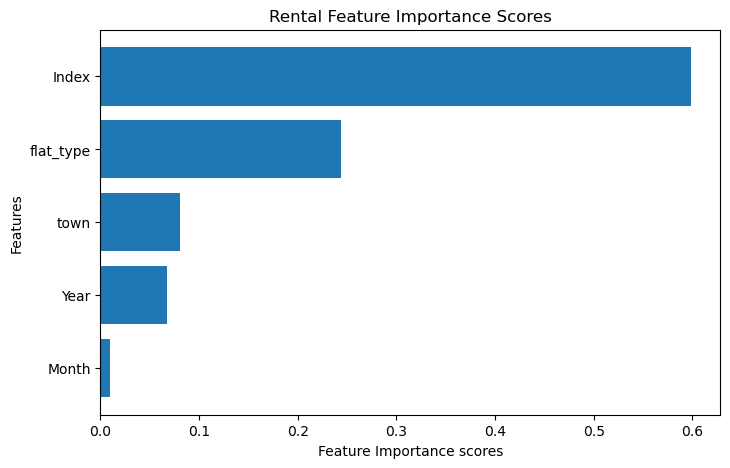

In [102]:
sorted_importance_scores_reverse = sorted_importance_scores[::-1]
sorted_feature_names_reverse = sorted_feature_names[::-1]

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_importance_scores_reverse)), sorted_importance_scores_reverse, tick_label=sorted_feature_names_reverse)
plt.xlabel('Feature Importance scores')
plt.ylabel('Features')
plt.title('Rental Feature Importance Scores')
plt.show()

In [ ]:
h1.head()

In [ ]:
h1['flat_type'].unique()

In [ ]:
h2=h1


flat_type_mapping = {
    '1-ROOM': 1,
    '2-ROOM': 2,
    '3-ROOM': 3,
    '4-ROOM': 4,
    '5-ROOM': 5,
    'EXECUTIVE': 6
}


h2['flat_type_encoded'] = h2['flat_type'].map(flat_type_mapping)

town_encoded = pd.get_dummies(h2['town'], prefix='town')

h2 = pd.concat([h2, town_encoded], axis=1)

In [ ]:
h2.drop(columns=['town','flat_type'],inplace=True)

In [ ]:
h2.head()

In [ ]:
y = h2['monthly_rent']

X = h2.drop(columns=['monthly_rent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Define XGBoost model with desired hyperparameters
model = RandomForestRegressor()

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define number of folds
cross_val_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_pred_val = model.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    cross_val_scores.append(rmse)

# Pick the fold with the best score
best_fold_idx = np.argmin(cross_val_scores)
print("Best Fold Index:", best_fold_idx)
best_fold_score = cross_val_scores[best_fold_idx]
print("Best Fold RMSE:", best_fold_score)

# Retrain the model using the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", test_rmse)

In [ ]:
###Wiht encoding the features

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Define XGBoost model with desired hyperparameters
model = xgb.XGBRegressor(enable_categorical=True)

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Define number of folds
cross_val_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_pred_val = model.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    cross_val_scores.append(rmse)

# Pick the fold with the best score
best_fold_idx = np.argmin(cross_val_scores)
print("Best Fold Index:", best_fold_idx)
best_fold_score = cross_val_scores[best_fold_idx]
print("Best Fold RMSE:", best_fold_score)

# Retrain the model using the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", test_rmse)

In [ ]:
&&
from sklearn.model_selection import GridSearchCV

# Define XGBoost model
model = xgb.XGBRegressor(enable_categorical=True)

# Define parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Retrain the model using the best hyperparameters
best_model = xgb.XGBRegressor(**best_params, enable_categorical=True)
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE with Best Model:", test_rmse)


In [ ]:
import numpy as np
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': uniform(0.01, 0.1),  # Uniform distribution between 0.01 and 0.1
    'max_depth': randint(3, 10),           # Discrete uniform distribution between 3 and 10
    'n_estimators': randint(50, 200),      # Discrete uniform distribution between 50 and 200
    'subsample': uniform(0.6, 0.4),        # Uniform distribution between 0.6 and 1.0
    'colsample_bytree': uniform(0.6, 0.4), # Uniform distribution between 0.6 and 1.0
}

# Initialize XGBoost regressor
model = xgb.XGBRegressor(enable_categorical=True)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,          # Number of parameter settings that are sampled
    scoring='neg_mean_squared_error',  # Use negative mean squared error as the scoring metric
    cv=5,               # 5-fold cross-validation
    verbose=1,
    random_state=42,    # Set random state for reproducibility
    n_jobs=-1           # Use all available CPU cores
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
test_rmse = np.sqrt(-random_search.best_score_)
print("Test RMSE:", test_rmse)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials,rand

best_rmse = float("inf")
best_model = None

def objective(params):
    # Define the number of folds for cross-validation
    num_folds = 10
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    rmse_values = []
    
    # Iterate through each fold
    for train_index, test_index in kf.split(X.values, y.values):  # Convert DataFrame to NumPy array
        X_train, X_test = X.values[train_index], X.values[test_index]  # Convert DataFrame to NumPy array
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        model = xgb.XGBRegressor(
            n_estimators=int(
                params['n_estimators']),
            learning_rate=params['learning_rate'],
            max_depth=int(params['max_depth']),
            min_child_weight=params['min_child_weight'],
            subsample=params['subsample'],
            reg_lambda=params['reg_lambda'],
            reg_alpha=params['reg_alpha'],
            objective='reg:gamma'
        ).fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        rmse_fold = np.sqrt(mean_squared_error(y_test, y_pred_test))
        print(rmse_fold)
        rmse_values.append(rmse_fold)
    # Calculate the mean RMSE over all folds
    mean_rmse = np.mean(rmse_values)

    global best_model
    if best_model is None or mean_rmse < best_model['rmse']:
        best_model = {
            'model': model,  # Store the model itself
            'rmse': mean_rmse
        }
    
    return {'loss': best_model['rmse'], 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1500, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0, 10),
    'subsample': hp.uniform('subsample', 0.1, 1),
    'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
    'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
}

# Create a trials object to keep track of the optimization process
trials = Trials()

# Run the hyperparameter optimization using the TPE algorithm
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200, trials=trials)
best_model = best_model['model']
# Print the best hyperparameters found by Hyperopt
print("Best Hyperparameters:")
print(best)

In [ ]:
f = open("rmse_values.txt", "a")
f.write(rmse_values)
f.close()

In [ ]:
import pickle

pickle.dump(best_model, open("rental.pickle.dat", "wb"))

In [ ]:
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Data Preprocessing (assuming X_train, X_test, y_train, y_test are available)

# 2. Choose Distance Metric (default is Euclidean distance)

# 3. Choose K
k = 20  # Example value of k

# 4. Fit the Model
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

# 5. Make Predictions
y_pred = model.predict(X_test)

# 6. Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", np.sqrt(mse))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = range(1, 21)

# Calculate mean squared error for each k
mse_values = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the MSE values against k
plt.plot(k_values, mse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()



In [ ]:
###Wihtout encoding the features

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Define XGBoost model with desired hyperparameters
model = xgb.XGBRegressor(enable_categorical=True)

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Define number of folds
cross_val_scores = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_pred_val = model.predict(X_val_fold)
    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    cross_val_scores.append(rmse)

# Pick the fold with the best score
best_fold_idx = np.argmin(cross_val_scores)
print("Best Fold Index:", best_fold_idx)
best_fold_score = cross_val_scores[best_fold_idx]
print("Best Fold RMSE:", best_fold_score)

# Retrain the model using the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", test_rmse)


In [ ]:
sorted_importance_scores_reverse = sorted_importance_scores[::-1]
sorted_feature_names_reverse = sorted_feature_names[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance_scores_reverse)), sorted_importance_scores_reverse, tick_label=sorted_feature_names_reverse)
plt.xlabel('Rental Feature Importance plot')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Root Mean Squared Error:", rmse)

In [ ]:
importances = tree_clf.feature_importances_

indices = np.argsort(importances)[::-1]

sorted_feature_names = [mycols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'max_depth': [3, 5, 7],             # Maximum tree depth
    'min_child_weight': [1, 3, 5],      # Minimum sum of instance weight needed in a child
    'subsample': [0.8, 0.9, 1.0],       # Subsample ratio of the training instances
    'reg_lambda': [0.1, 1.0, 10.0],     # L2 regularization term on weights
    'reg_alpha': [0.1, 0.5, 1.0]         # L1 regularization term on weights
}

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')  # Use 'reg:squarederror' for regression task

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

#print("Best Parameters:", best_params)
#print("Best Score (negative mean squared error):", best_score)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, rand
import numpy as np

# Define search space for hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1500, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'min_child_weight': hp.uniform('min_child_weight', 0, 10),
    'subsample': hp.uniform('subsample', 0.1, 1),
    'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
    'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
}

# Define categorical features
categorical_features = ['town', 'flat_type']

def objective(params):
    # Initialize params dictionary
    params = {
        'objective': 'reg:squarederror',  # Set the objective function
        'eval_metric': 'rmse',            # Set the evaluation metric
        'n_estimators': int(params['n_estimators']),  # Number of boosting rounds
        'learning_rate': params['learning_rate'],     # Learning rate
        'max_depth': int(params['max_depth']),        # Maximum tree depth
        'min_child_weight': params['min_child_weight'],   # Minimum sum of instance weight needed in a child
        'subsample': params['subsample'],                # Subsample ratio of the training instances
        'reg_lambda': params['reg_lambda'],              # L2 regularization term on weights
        'reg_alpha': params['reg_alpha'],                # L1 regularization term on weights
    }
    
    # Perform stratified k-fold cross-validation
    skf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Convert categorical columns to category dtype
        for col in categorical_features:
            X_train[col] = X_train[col].astype('category')
            X_test[col] = X_test[col].astype('category')

        # Create DMatrix
        dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist(), enable_categorical=True)
        dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_test.columns.tolist(), enable_categorical=True)
        
        # Train XGBoost model
        model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'], evals=[(dtest, 'test')],
                          early_stopping_rounds=10)
    

        # Make predictions
        y_pred = model.predict(dtest)

        # Calculate RMSE
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        rmse_scores.append(rmse)
    
    mean_rmse = np.mean(rmse_scores)

    global best_model
    if best_model is None or mean_rmse < best_model['rmse']:
        best_model = {
            'model': model,  # Store the model itself
            'rmse': mean_rmse
        }
    
    return {'loss': mean_rmse, 'status': STATUS_OK}

# Initialize best_model
best_model = None

# Use TPE algorithm to find the best hyperparameters
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=10, trials=trials)

# Retrieve the best model
best_model = best_model['model']

# Print the best hyperparameters
print("Best Hyperparameters:", best)


In [ ]:
rental.head()

In [167]:
spi = pd.read_csv("rental_index.csv")
spi.head()

,Month,Year,Index,Q
0,1,2019,86.8,0.3
1,2,2019,86.6,0.6
2,3,2019,86.1,-0.7
3,4,2019,86.7,0.2
4,5,2019,86.5,-0.2


In [168]:
y = spi['Index']

X = spi.drop(columns=['Index','Q'])

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [211]:
from sklearn.svm import SVC

svc = xgb.XGBRegressor()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.3904773882764148


In [212]:
X.head()

,Month,Year
0,1,2019
1,2,2019
2,3,2019
3,4,2019
4,5,2019


In [230]:
pred = []
for i in range(3,13):
    X_pred = np.array([[i,2024]])
    X_pred.reshape(1,-1)
    print(svc.predict(X_pred)[0])
    

135.41576
135.4204
134.82086
134.82599
132.02582
130.33408
127.05162
127.04671
127.049835
127.05638


In [228]:
pred

[array([135.41576], dtype=float32),
 array([135.4204], dtype=float32),
 array([134.82086], dtype=float32),
 array([134.82599], dtype=float32),
 array([132.02582], dtype=float32),
 array([130.33408], dtype=float32),
 array([127.05162], dtype=float32),
 array([127.04671], dtype=float32),
 array([127.049835], dtype=float32),
 array([127.05638], dtype=float32)]